<a href="https://colab.research.google.com/github/SOWMIYA-AB/student_scores_project/blob/main/sms_spam_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS Spam Classification — Logistic Regression (Ready for Google Colab)\n\n**Dataset:** SMS Spam Collection (UCI / Kaggle mirror)\n**Goal:** train a Logistic Regression classifier to detect spam SMS messages.\n\nOpen this notebook in Google Colab (or run locally) and run all cells. The dataset will be downloaded automatically from the UCI repository.\n

In [9]:
!wget -q --show-progress https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip -O smsspamcollection.zip
!unzip -o smsspamcollection.zip
!ls -l SMSSpamCollection


smsspamcollection.z     [ <=>                ] 198.65K  --.-KB/s    in 0.1s    
Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  
-rw-r--r-- 1 root root 477907 Mar 15  2011 SMSSpamCollection


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt

# read the dataset (tab-separated, no header)
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label','text'])
print('Shape:', df.shape)
df.head()


Shape: (5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
print(df['label'].value_counts())
print('\nSample messages:')
display(df.sample(5, random_state=42))

import re
import string

def clean_text(s):
    s = s.lower()
    s = re.sub(r"http\S+", "", s)
    s = re.sub(r"\d+", "", s)
    s = s.translate(str.maketrans('', '', string.punctuation))
    s = s.strip()
    return s

df['text_clean'] = df['text'].astype(str).apply(clean_text)
df.head()


label
ham     4825
spam     747
Name: count, dtype: int64

Sample messages:


,label,text
3245,ham,Squeeeeeze!! This is christmas hug.. If u lik ...
944,ham,And also I've sorta blown him off a couple tim...
1044,ham,Mmm thats better now i got a roast down me! i...
2484,ham,Mm have some kanji dont eat anything heavy ok
812,ham,So there's a ring that comes with the guys cos...


,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [12]:
df['label_num'] = df['label'].map({'ham':0, 'spam':1})
X = df['text_clean']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train size:', X_train.shape[0], 'Test size:', X_test.shape[0])

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Train size: 4457 Test size: 1115


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print('\nClassification report:\n')
print(classification_report(y_test, y_pred, target_names=['ham','spam']))


Accuracy: 0.9704
Precision: 1.0000
Recall: 0.7785

Classification report:

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



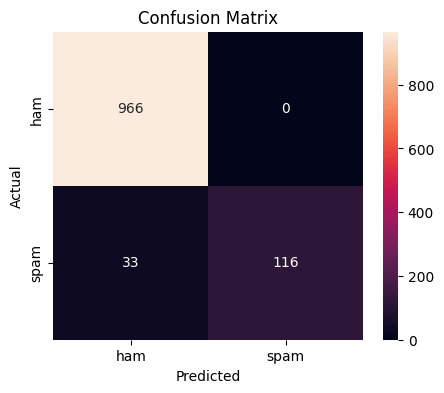

Saved model and vectorizer to disk.


In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['ham','spam'], yticklabels=['ham','spam'], ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

import joblib
joblib.dump(model, 'logreg_sms_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')
print('Saved model and vectorizer to disk.')


In [15]:
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]
top_n = 30
top_spam_idx = np.argsort(coefs)[-top_n:][::-1]

print('Top words indicative of spam:')
for i in top_spam_idx[:20]:
    print(f'{feature_names[i]}  ({coefs[i]:.3f})')


Top words indicative of spam:
call  (4.434)
txt  (4.384)
free  (3.854)
to  (3.415)
text  (3.148)
reply  (3.079)
stop  (3.014)
claim  (2.694)
from  (2.614)
mobile  (2.587)
your  (2.477)
win  (2.211)
now  (2.162)
or  (2.122)
prize  (2.101)
service  (2.045)
ur  (1.993)
won  (1.988)
chat  (1.985)
you have  (1.954)


In [16]:
with open('results.txt','w') as f:
    f.write(f'Accuracy: {acc:.4f}\n')
    f.write(f'Precision: {prec:.4f}\n')
    f.write(f'Recall: {rec:.4f}\n\n')
    f.write('Classification report:\n')
    f.write(classification_report(y_test, y_pred, target_names=['ham','spam']))
print('Wrote results.txt')
!ls -l results.txt logreg_sms_model.joblib tfidf_vectorizer.joblib SMSSpamCollection smsspamcollection.zip


Wrote results.txt
-rw-r--r-- 1 root root  40891 Nov 11 03:51 logreg_sms_model.joblib
-rw-r--r-- 1 root root    400 Nov 11 03:51 results.txt
-rw-r--r-- 1 root root 477907 Mar 15  2011 SMSSpamCollection
-rw-r--r-- 1 root root 203415 Nov 11 03:51 smsspamcollection.zip
-rw-r--r-- 1 root root 187153 Nov 11 03:51 tfidf_vectorizer.joblib
